In [1]:
!pip install tensorflow




[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install openvino-dev



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install keras


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\downloads\3 in 1 (2)\archive\archive\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [6]:
model_path = r"D:\downloads\3 in 1 (2)\3 in 1 (2)\3 in 1\3 in 1\trained_plant_disease_model.keras"
cnn = tf.keras.models.load_model(model_path)

In [7]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import cv2
print(cv2.__version__)


4.11.0


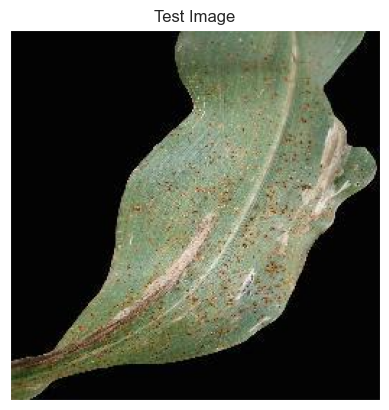

In [14]:
#Test Image Visualization
import cv2
image_path = r"D:\downloads\3 in 1 (2)\archive\archive\test\test\CornCommonRust1.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [16]:
print(predictions)

[[1.3701397e-12 6.0101788e-13 4.3833034e-11 9.1826689e-15 9.5877889e-12
  1.3050345e-12 3.1878366e-14 9.2204422e-10 9.9997914e-01 8.8011178e-12
  2.1586108e-11 2.8013752e-17 2.2406954e-14 7.1106611e-16 3.2102598e-18
  4.5320911e-14 1.2221416e-13 1.3066790e-15 2.9492839e-11 7.1143113e-12
  1.6943970e-07 6.9788732e-17 2.5510900e-13 9.3040911e-18 1.7852680e-16
  9.5755261e-12 2.7508047e-13 2.9989646e-18 6.9559959e-15 1.8171985e-11
  2.0753934e-05 2.7536288e-13 6.5180972e-11 9.8701641e-19 2.6558354e-15
  1.8269839e-16 1.5316862e-18 1.9419863e-12]]


In [17]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


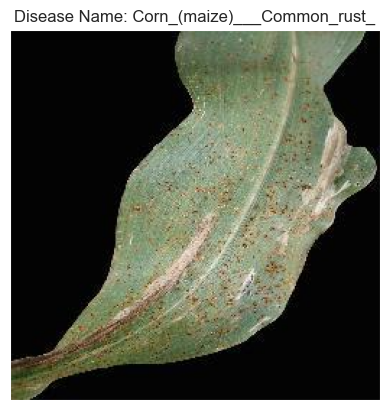

In [18]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()